<a href="https://colab.research.google.com/github/jiminkyung/orm/blob/main/240124_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_DF_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 모델비교

In [1]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

## 실제 모델링을 위한 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
# 1. 데이터 import
# 다운받은 데이터를 코랩에서 불러오겠습니다.
wine = pd.read_csv('/content/winequality_red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# 타겟 -> 우리가 예측해야하는 변수 or 분류해야할 변수
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

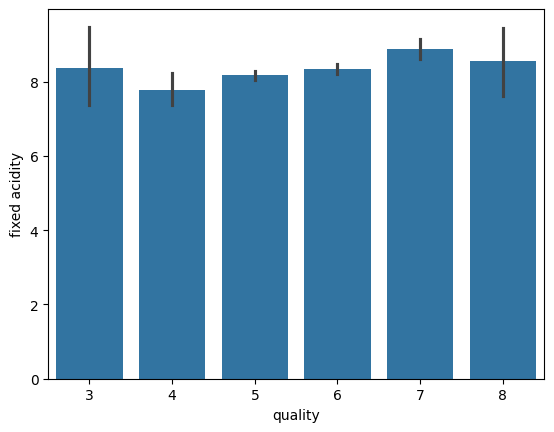

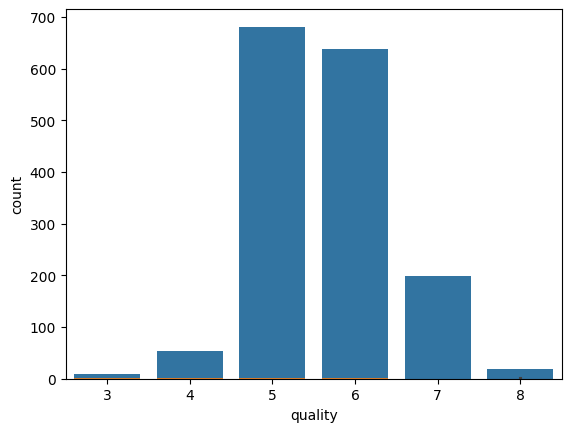

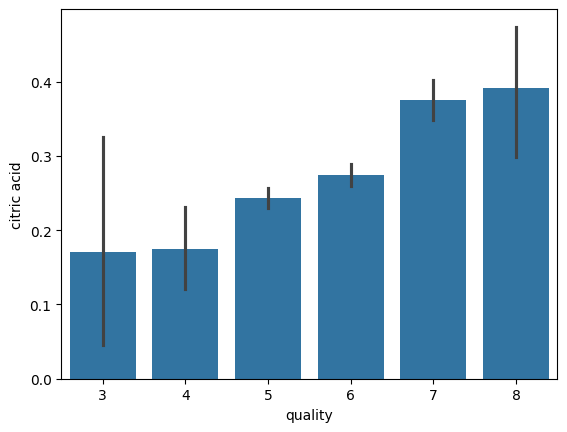

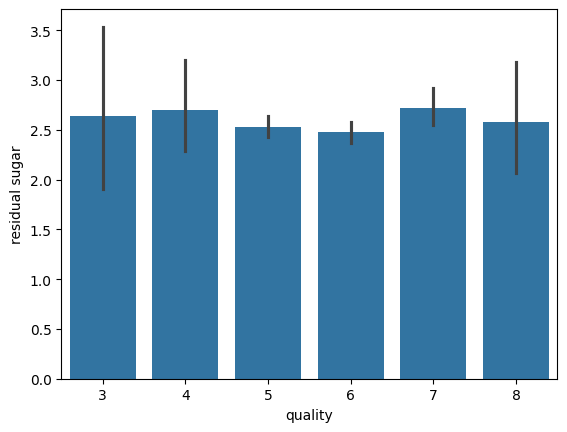

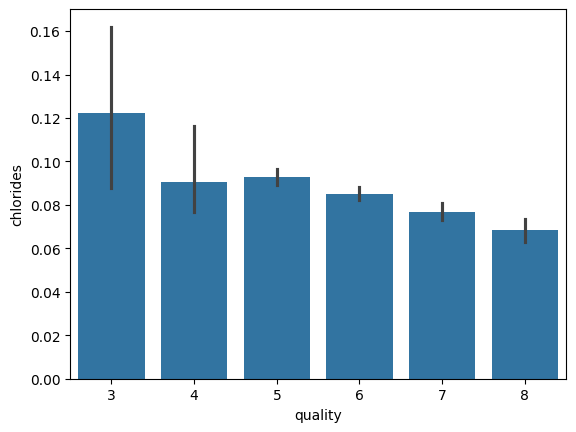

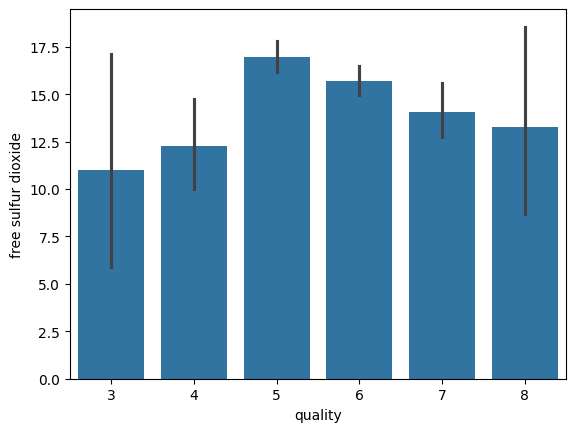

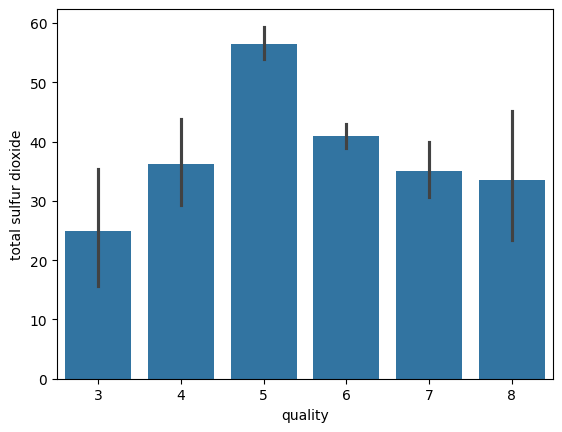

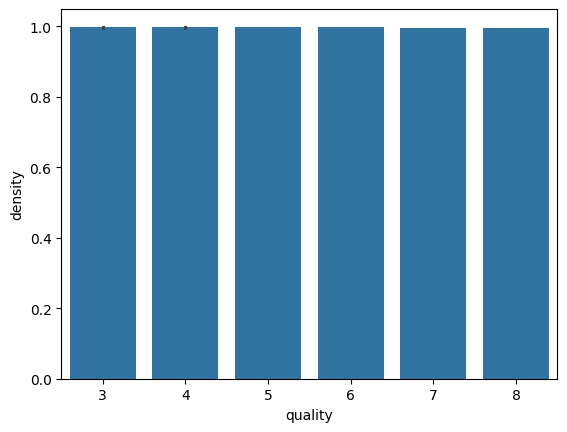

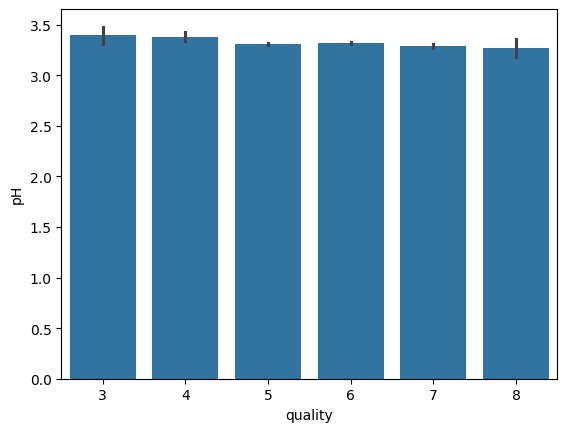

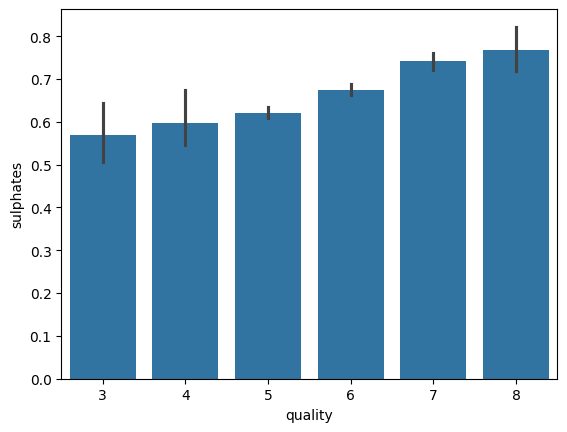

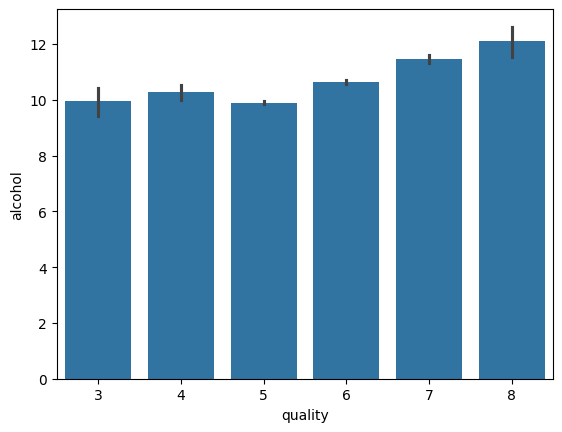

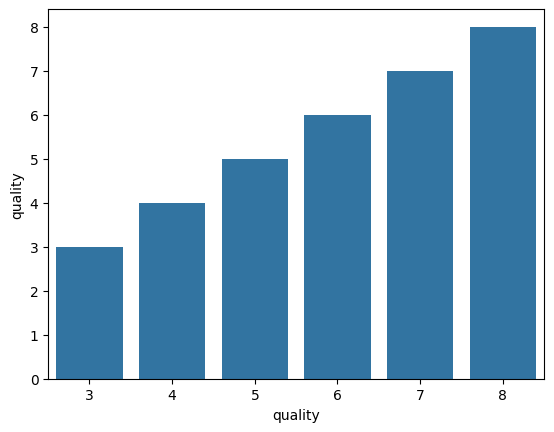

In [5]:
# 2. 데이터 확인
sns.countplot(x='quality', data=wine)

# 특성별로 데이터를 시각화 하여 데이터에 대한 정보를 파악합니다
df1 = wine.select_dtypes([int, float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x='quality', y =col, data=df1)

In [6]:
## 6.5점을 기준으로 좋은 와인과 나쁜 와인을 구분하겠다고 선언
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [7]:
wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [8]:
## Good/Bad는 인식할 수 없음. 따라서 이를 인식할 수 있도록 Label Encoding을 실시

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [9]:
wine['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

`bad/good`을 `0/1`로 변경해줌.

In [11]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']

## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


## 측정 지표의 표준화.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [12]:
x_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [13]:
## 로지스틱 회귀
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Accuracy: 0.875
Precision: 0.7058823529411765
Recall: 0.2553191489361702


In [14]:
## SVC
model_svc = SVC()
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
print(classification_report(y_test, y_pred_svc))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("Precision:", metrics.precision_score(y_test, y_pred_svc))
print("Recall:", metrics.recall_score(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Accuracy: 0.875
Precision: 0.7058823529411765
Recall: 0.2553191489361702


모델 가져오고, fit하고, 예측하고, report 끝!

In [15]:
## KNN
model_knn = KNeighborsClassifier(5)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.61      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.76      0.68      0.71       320
weighted avg       0.86      0.88      0.86       320

Accuracy: 0.875
Precision: 0.6129032258064516
Recall: 0.40425531914893614


In [16]:
## NB
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
y_pred_NB = model_NB.predict(x_test)
print(classification_report(y_test, y_pred_NB))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Precision:", metrics.precision_score(y_test, y_pred_NB))
print("Recall:", metrics.recall_score(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       273
           1       0.50      0.74      0.60        47

    accuracy                           0.85       320
   macro avg       0.73      0.81      0.75       320
weighted avg       0.89      0.85      0.86       320

Accuracy: 0.853125
Precision: 0.5
Recall: 0.7446808510638298


In [17]:
## Decision Tree
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_test)
print(classification_report(y_test, y_pred_tree))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       273
           1       0.47      0.43      0.44        47

    accuracy                           0.84       320
   macro avg       0.68      0.67      0.68       320
weighted avg       0.84      0.84      0.84       320

Accuracy: 0.84375
Precision: 0.46511627906976744
Recall: 0.425531914893617


In [18]:
## RandomForest
model_rfc = RandomForestClassifier(n_estimators=200)
model_rfc.fit(x_train, y_train)
y_pred_rfc = model_rfc.predict(x_test)
print(classification_report(y_test, y_pred_rfc))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision:", metrics.precision_score(y_test, y_pred_rfc))
print("Recall:", metrics.recall_score(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.67      0.38      0.49        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320

Accuracy: 0.88125
Precision: 0.6666666666666666
Recall: 0.3829787234042553


이걸 자동화를 시키려면 어떻게 해야할까? 라는 고민도 해보기를.

In [20]:
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Support Vector Machine Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("KNN Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Gausian NB Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc))

acc_df = pd.DataFrame({'classifier':
                      ['Logistic Regression ',
                       'Support Vector Machine',
                       'KNN',
                       'Gausian NB',
                       'Decision Tree',
                       'Random Forest'],
                      'accuracy':
                      [metrics.accuracy_score(y_test, y_pred),
                       metrics.accuracy_score(y_test, y_pred_svc),
                       metrics.accuracy_score(y_test, y_pred_knn),
                       metrics.accuracy_score(y_test, y_pred_NB),
                       metrics.accuracy_score(y_test, y_pred_tree),
                       metrics.accuracy_score(y_test, y_pred_rfc),
                       ]
                      })

acc_df

Logistic Regression Accuracy: 0.875
Support Vector Machine Accuracy: 0.875
KNN Accuracy: 0.875
Gausian NB Accuracy: 0.853125
Decision Tree Accuracy: 0.853125
Random Forest Accuracy: 0.88125


,classifier,accuracy
0,Logistic Regression,0.875000
1,Support Vector Machine,0.875000
2,KNN,0.875000
3,Gausian NB,0.853125
4,Decision Tree,0.843750
5,Random Forest,0.881250


In [21]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']

## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 2023)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

1.0
0.9


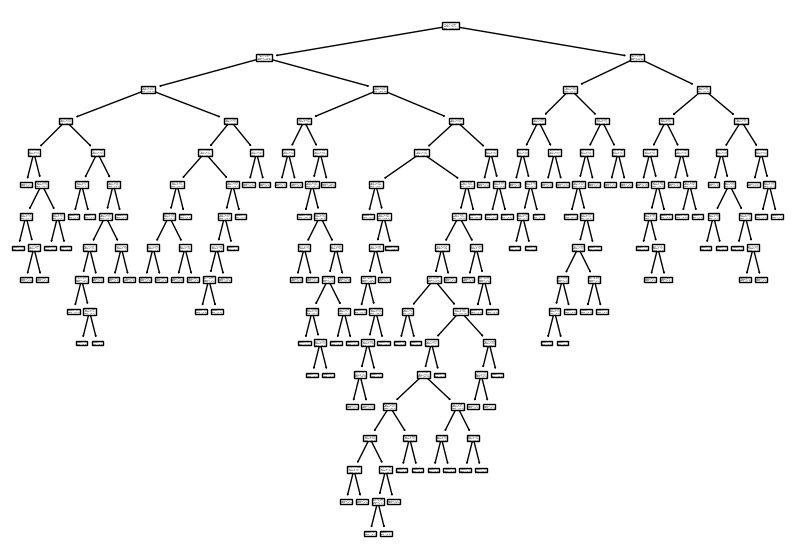

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize =(10,7))
plot_tree(dt)
plt.show()

In [26]:
# 1번(맨위)
# sample 1279 - 품질 나쁜 음료 (6.5이하) 1109 / 품질이 좋은 음료 (6.5 이상) 170

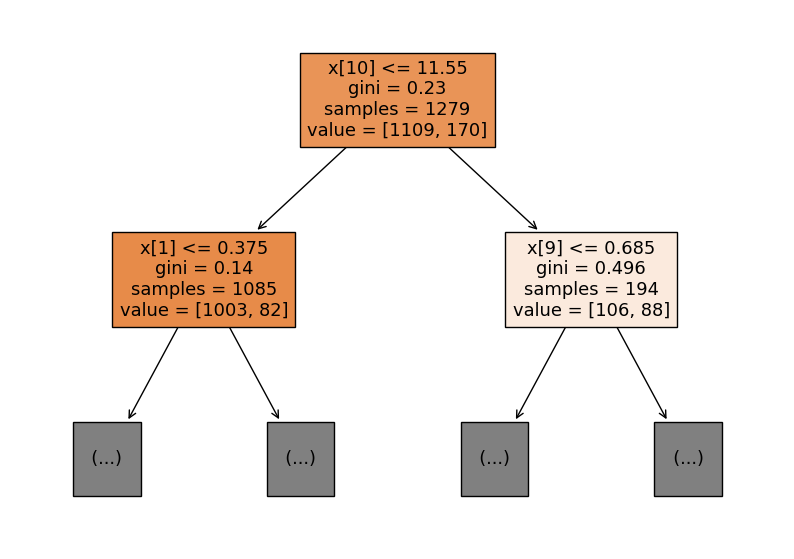

In [23]:
plt.figure(figsize =(10,7))
plot_tree(dt, max_depth = 1, filled = True)
plt.show()